In [1]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Mostrar todas las columnas sin límite
pd.set_option('display.max_columns', None)

##### **Precios de la Yerba Mate**

Iniciamos analizando los precios de los productos de Yerba Mate dado que son un producto de consumo masivo presente en todo el territorio nacional.

In [3]:
colores = {
    'Express': 'orange',
    'Market': 'red',
    'Hipermercado Carrefour': 'blue',
}
productos_df = pd.read_csv('productos_procesado.zip', sep='|')

# Al leer el csv las columnas vuelven a ser sus tipos nativos entonces las reconvertimon a categóricas
productos_df['id_sucursal'] = productos_df['id_sucursal'].astype('category')
productos_df['id_producto'] = productos_df['id_producto'].astype('category')
productos_df['productos_unidad_medida_presentacion'] = productos_df['productos_unidad_medida_presentacion'].astype('category')
productos_df['productos_marca'] = productos_df['productos_marca'].astype('category')
productos_df['productos_unidad_medida_referencia'] = productos_df['productos_unidad_medida_referencia'].astype('category')
productos_df['comercio_bandera_nombre'] = productos_df['comercio_bandera_nombre'].astype('category')
productos_df['id_producto_code'] = productos_df['id_producto'].cat.codes

productos_df = productos_df[productos_df['productos_descripcion'].str.contains('yerba', case=False, na=False)]
display(productos_df.head())
display(productos_df.info())

,id_sucursal,id_producto,productos_ean,productos_descripcion,productos_cantidad_presentacion,productos_unidad_medida_presentacion,productos_marca,productos_precio_lista,productos_precio_referencia,productos_cantidad_referencia,productos_unidad_medida_referencia,productos_precio_unitario_promo1,productos_leyenda_promo1,productos_precio_unitario_promo2,productos_leyenda_promo2,precio_zscore,id_bandera,sucursales_nombre,sucursales_tipo,sucursales_latitud,sucursales_longitud,sucursales_barrio,sucursales_localidad,sucursales_provincia,comercio_bandera_nombre,localidad_provincia,id_producto_code
68,109,7790710334641,True,YERBA MATE SILUETA NARNJA CBSE CORMILLOT X 500...,1.0,UNI,CBSE,1699.0,3398.0,500.0,GRM,NaN,NaN,NaN,NaN,-1.486396,2,La Plata I,Supermercado,-34.913497,-57.951821,NaN,La Plata,Buenos Aires,Market,La Plata - Buenos Aires,4179
223,134,7790387014624,True,YERBA MATE SUAVE ORIG CONTROL UNION X 500GRS,1.0,UNI,UNION,2500.0,5000.0,500.0,GRM,NaN,NaN,NaN,NaN,-0.264211,2,Tandil II,Supermercado,-37.326474,-59.135087,NaN,Tandil,Buenos Aires,Market,Tandil - Buenos Aires,3453
273,226,7790070509109,True,YERBA MATE SUAVE NOBLEZA GAUCHA X 500 GRS,1.0,UNI,NOBLEZA GAUCHA,1645.0,3290.0,500.0,GRM,NaN,NaN,NaN,NaN,-0.664215,2,Martínez (Edison),Supermercado,-34.492689,-58.499192,NaN,Martínez,Buenos Aires,Market,Martínez - Buenos Aires,2608
294,115,7790710334641,True,YERBA MATE SILUETA NARNJA CBSE CORMILLOT X 500...,1.0,UNI,CBSE,1699.0,3398.0,500.0,GRM,NaN,NaN,NaN,NaN,-1.486396,2,Flores,Supermercado,-34.627423,-58.458170,NaN,Ciudad Autónoma de Buenos Aires,CABA,Market,Ciudad Autónoma de Buenos Aires - CABA,4179
319,195,7798067630010,True,YERBA COMPUESTA ARREGUI X 500 GRS,1.0,UNI,ARREGUI,1600.0,3200.0,500.0,GRM,1450.0,Promo A valida desde el 01/05/2025 hasta 30/05...,NaN,NaN,-0.264574,2,Olazabal,Supermercado,-34.574379,-58.482128,NaN,Ciudad Autónoma de Buenos Aires,CABA,Market,Ciudad Autónoma de Buenos Aires - CABA,9277


<class 'pandas.core.frame.DataFrame'>
Index: 5248 entries, 68 to 370457
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   id_sucursal                           5248 non-null   category
 1   id_producto                           5248 non-null   category
 2   productos_ean                         5248 non-null   bool    
 3   productos_descripcion                 5248 non-null   object  
 4   productos_cantidad_presentacion       5248 non-null   float64 
 5   productos_unidad_medida_presentacion  5248 non-null   category
 6   productos_marca                       5248 non-null   category
 7   productos_precio_lista                5248 non-null   float64 
 8   productos_precio_referencia           5248 non-null   float64 
 9   productos_cantidad_referencia         5248 non-null   float64 
 10  productos_unidad_medida_referencia    5248 non-null   category
 11  produc

None

In [4]:
productos_df["id_producto"].nunique()

121

In [5]:
productos_df["id_producto"].value_counts()

id_producto
7791720024782    77
7790387013634    77
7791720024751    77
7790387014624    77
7792280005709    77
                 ..
7790580131760     0
7790580131876     0
7790580132163     0
7790580132170     0
9002490258313     0
Name: count, Length: 11560, dtype: int64

De la ultima celda podemos analizar que hay productos que estan en TODAS las sucursales y que hay productos que no

Para tener un análisis acorde tomamos aquellos productos de bebidas no alcóholicas que están en los tres tipos de comercios.

In [6]:
# Contar el número de sucursales únicas por producto
productos_en_todas_sucursales = productos_df.groupby('id_producto')['comercio_bandera_nombre'].nunique()

# Filtrar los productos que están en todas los comercios, que en nuestro caso son 3, expres, hiper, market
productos_en_todas_sucursales = productos_en_todas_sucursales[productos_en_todas_sucursales == 3].index

# Filtrar el DataFrame original
productos_df_en_varias_sucursales = productos_df[productos_df['id_producto'].isin(productos_en_todas_sucursales)]
print(f"Cantidad de productos que estan en los 3 comercios: {productos_df_en_varias_sucursales['id_producto'].nunique()}")

Cantidad de productos que estan en los 3 comercios: 50


/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_24286/3562760019.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_en_todas_sucursales = productos_df.groupby('id_producto')['comercio_bandera_nombre'].nunique()


### **Análisis de Outliers**

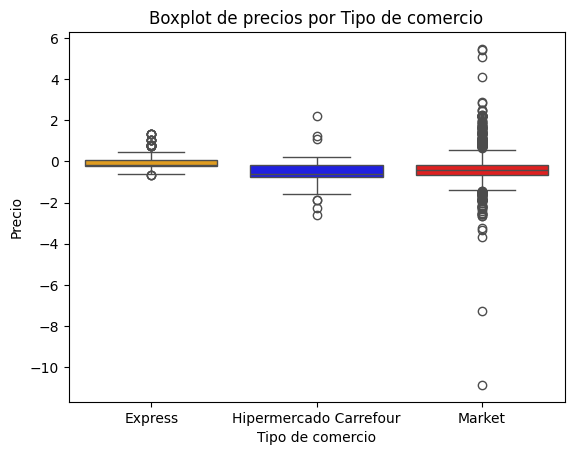

In [7]:
sns.boxplot(x='comercio_bandera_nombre', y='precio_zscore', hue='comercio_bandera_nombre', data=productos_df_en_varias_sucursales, palette=colores, legend=False)

plt.title('Boxplot de precios por Tipo de comercio')
plt.xlabel('Tipo de comercio')
plt.ylabel('Precio')
plt.show()

In [8]:
def remove_outliers_iqr(group):
    Q1 = group['precio_zscore'].quantile(0.25)
    Q3 = group['precio_zscore'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return group[(group['precio_zscore'] >= lower) & (group['precio_zscore'] <= upper)]

# Aplica la función por categoría
productos_df_en_varias_sucursales = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre', group_keys=False).apply(remove_outliers_iqr)

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_24286/1922502756.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_df_en_varias_sucursales = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre', group_keys=False).apply(remove_outliers_iqr)
/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_24286/1922502756.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  productos_df_en_varias_sucursales = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre', 

Volvemos a filtrar los productos que están en los 3 tipos de comercio ya que al eliminar outliers se pudo producir que algún producto no esté en todos estos tipos.

In [9]:
# Contar el número de sucursales únicas por producto
productos_en_todas_sucursales = productos_df_en_varias_sucursales.groupby('id_producto')['comercio_bandera_nombre'].nunique()

# Filtrar los productos que están en todas los comercios, que en nuestro caso son 3, expres, hiper, market
productos_en_todas_sucursales = productos_en_todas_sucursales[productos_en_todas_sucursales == 3].index

# Filtrar el DataFrame original
productos_df_en_varias_sucursales = productos_df_en_varias_sucursales[productos_df_en_varias_sucursales['id_producto'].isin(productos_en_todas_sucursales)]
print(f"Cantidad de productos que estan en los 3 comercios: {productos_df_en_varias_sucursales['id_producto'].nunique()}")

Cantidad de productos que estan en los 3 comercios: 39


/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_24286/1613971439.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_en_todas_sucursales = productos_df_en_varias_sucursales.groupby('id_producto')['comercio_bandera_nombre'].nunique()


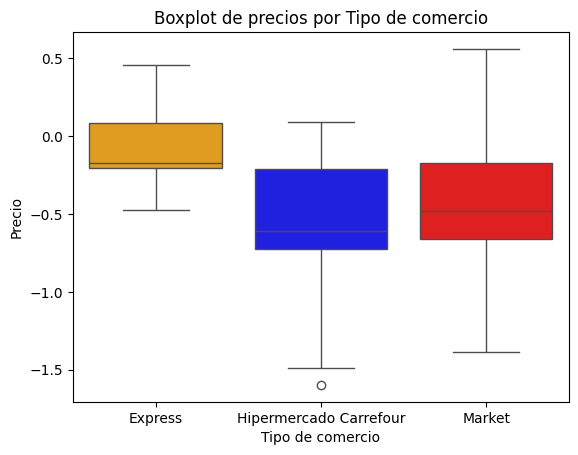

In [10]:
sns.boxplot(x='comercio_bandera_nombre', y='precio_zscore', hue='comercio_bandera_nombre', data=productos_df_en_varias_sucursales, palette=colores, legend=False)

plt.title('Boxplot de precios por Tipo de comercio')
plt.xlabel('Tipo de comercio')
plt.ylabel('Precio')
plt.show()

### **Análisis de precios máximos y mínimos**

Analizamos el precio máximo y mínimo de cada producto agrupado por el tipo de comercio.

In [11]:
print("Cantidad de registros para cada tipo de comercio:")
print(productos_df_en_varias_sucursales['comercio_bandera_nombre'].value_counts())

# Agrupar por id_producto y comercio_bandera_nombre y calcular el máximo y mínimo de precio_zscore
resultado = productos_df_en_varias_sucursales.groupby(['id_producto_code', 'comercio_bandera_nombre'])['precio_zscore'].agg(['max', 'min']).reset_index()

resultado.head()

Cantidad de registros para cada tipo de comercio:
comercio_bandera_nombre
Market                    1668
Express                    871
Hipermercado Carrefour      39
Name: count, dtype: int64


/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_24286/2361889854.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado = productos_df_en_varias_sucursales.groupby(['id_producto_code', 'comercio_bandera_nombre'])['precio_zscore'].agg(['max', 'min']).reset_index()


,id_producto_code,comercio_bandera_nombre,max,min
0,2596,Express,-0.061547,-0.061547
1,2596,Hipermercado Carrefour,-1.070318,-1.070318
2,2596,Market,0.394910,-0.518004
3,2604,Express,0.363394,0.363394
4,2604,Hipermercado Carrefour,-0.408022,-0.408022


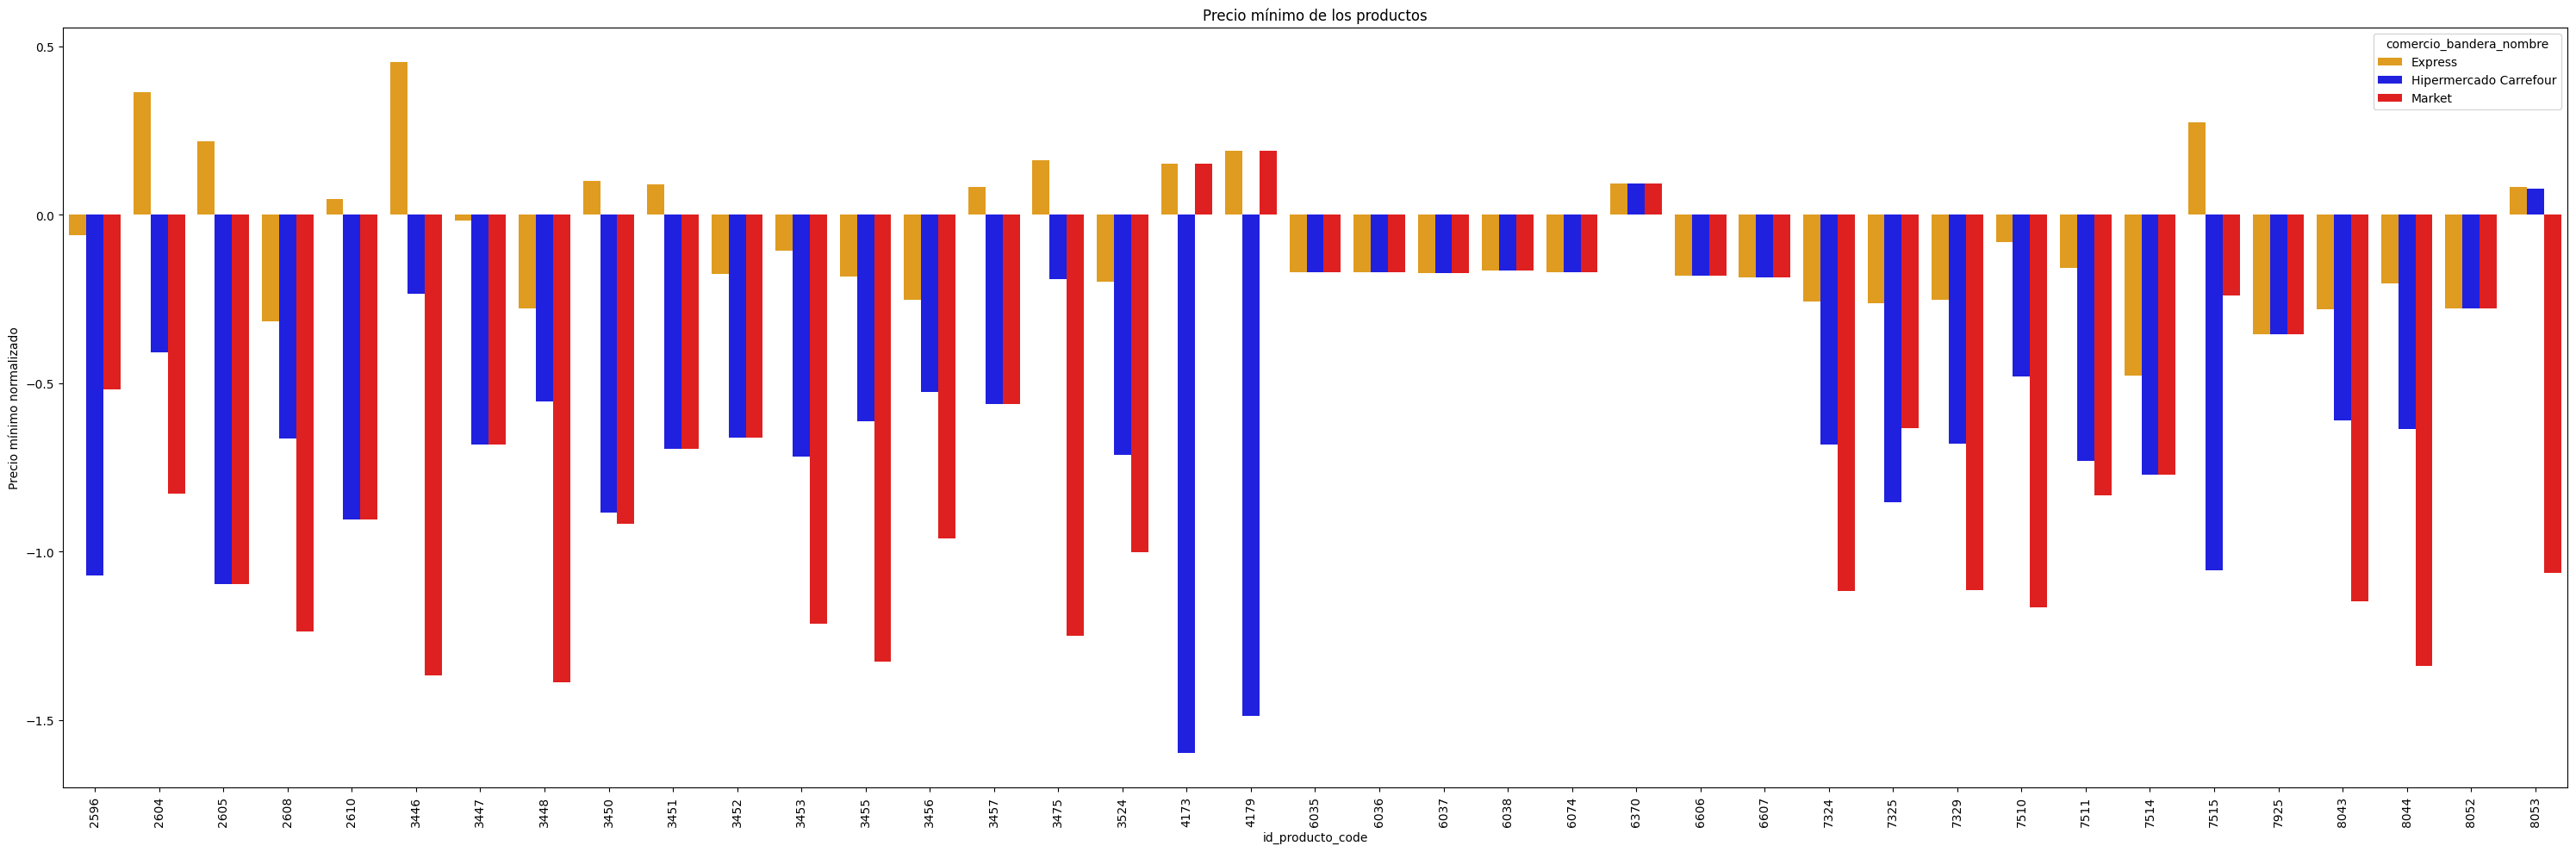

In [12]:
plt.figure(figsize=(30, 10))
sns.barplot(data=resultado, y='min', x='id_producto_code', hue='comercio_bandera_nombre', palette=colores)

plt.xticks(rotation=90)
plt.title("Precio mínimo de los productos")
plt.ylabel('Precio mínimo normalizado')
plt.tight_layout()
plt.show()

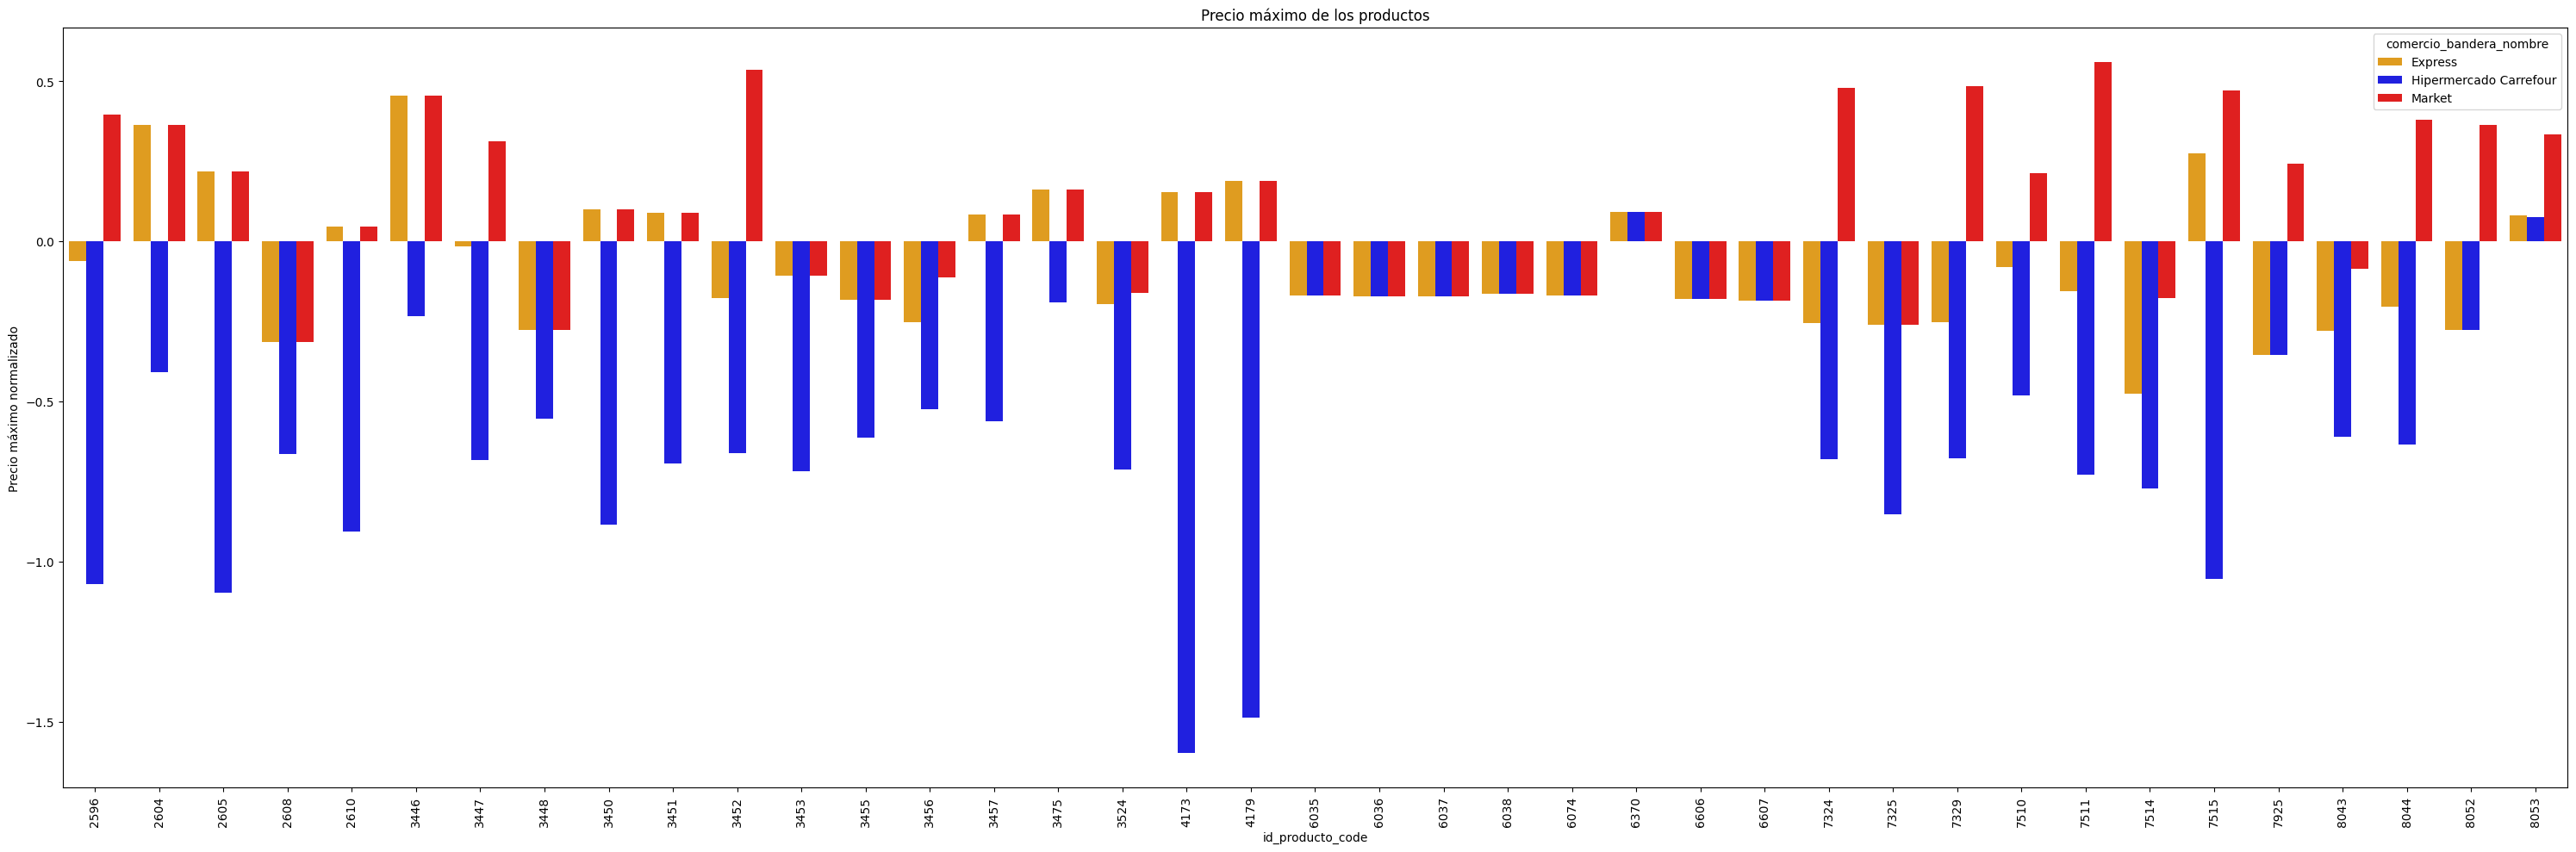

In [13]:
plt.figure(figsize=(30, 10))
sns.barplot(data=resultado, y='max', x='id_producto_code', hue='comercio_bandera_nombre', palette=colores)

plt.xticks(rotation=90)
plt.title("Precio máximo de los productos")
plt.ylabel('Precio máximo normalizado')
plt.tight_layout()
plt.show()

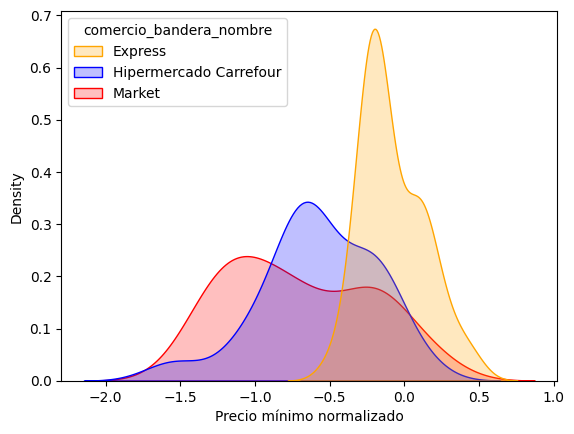

In [14]:
sns.kdeplot(data=resultado, x='min', hue='comercio_bandera_nombre', fill=True, palette=colores)
plt.xlabel('Precio mínimo normalizado')
plt.show()

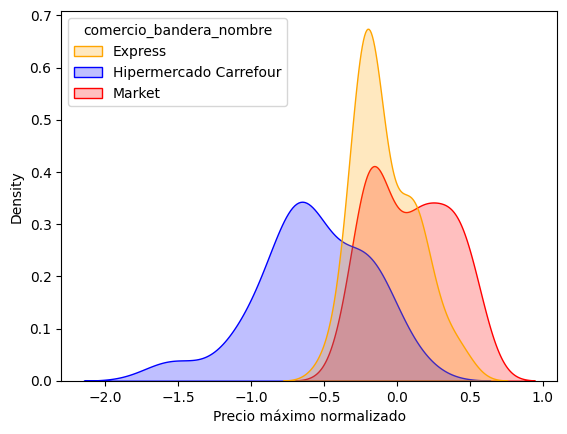

In [15]:
sns.kdeplot(data=resultado, x='max', hue='comercio_bandera_nombre', fill=True, palette=colores)
plt.xlabel('Precio máximo normalizado')
plt.show()

/var/folders/gf/xjt2z0l14fn8dy1y22cnhzm40000gn/T/ipykernel_24286/1158149480.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre')['precio_zscore'].mean().sort_values()


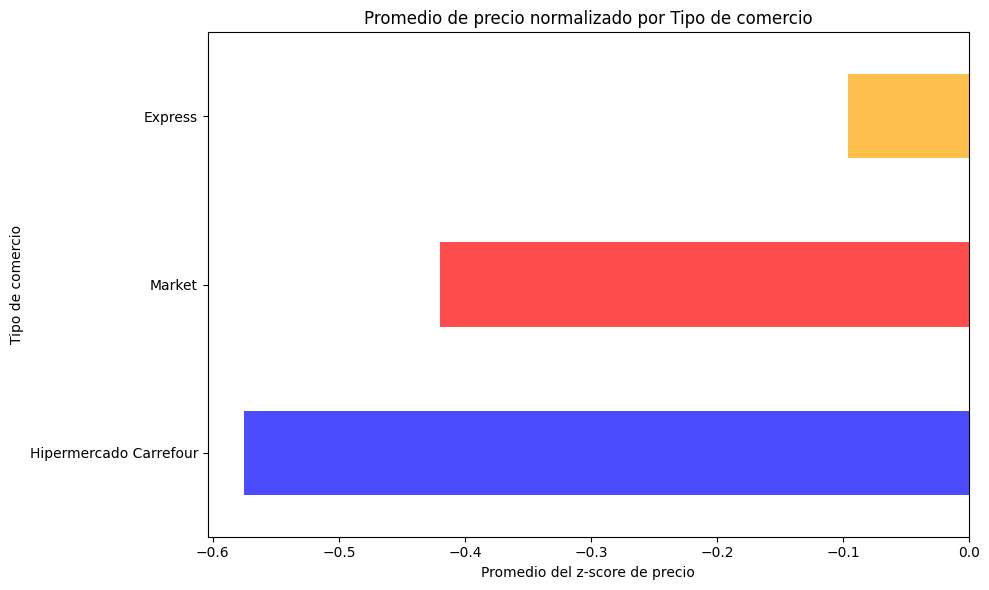

In [16]:
promedios = productos_df_en_varias_sucursales.groupby('comercio_bandera_nombre')['precio_zscore'].mean().sort_values()
# Hacer el gráfico de barras
colores_barras = [colores[nombre] for nombre in promedios.index]
promedios.plot(kind='barh', color=colores_barras, figsize=(10, 6), alpha=0.7)
plt.xlabel('Promedio del z-score de precio')
plt.ylabel('Tipo de comercio')
plt.title('Promedio de precio normalizado por Tipo de comercio')
plt.tight_layout()
plt.show()